# Part I - (Ford go bike Trips data)
## by Tu Nguyen Ngoc

## Introduction
> Introduce the dataset:

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

>**Link download:** https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

Test dataset

In [3]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Clean data

In [4]:
# Drop null
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
#  Drop [['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']]
df = df[df['start_station_id'].notna()]

Test

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [7]:
# Total rows
df.shape[0]

183215

In [8]:
# Total colums
df.shape[1]

16

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

start_time, end_time need are datetimetype

In [10]:
# Change dtype of start time
df.start_time = pd.to_datetime(df.start_time)
# Change dtype of end time
df.end_time = pd.to_datetime(df.end_time)

> Add day of week

In [11]:
# Get days of week
df['day_of_week'] = pd.DatetimeIndex(df['start_time']).strftime('%A')

# Get start hours
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)

In [12]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23


start_station_id and end_station_id is int64

In [13]:
df.start_station_id = df.start_station_id.astype('int64')

df.end_station_id = df.end_station_id.astype('int64')

start_station_name is string type

In [14]:
df.start_station_name = df.start_station_name.astype('string')

Test

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int64         
 4   start_station_name       183215 non-null  string        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> The dataset include 183215 rows and 16 columns. It's provide the infomation about rides: time, state, and bike info.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of my analysis is figure out releated beetween duration time and some other datafram(station, garder, . . .) 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think I will care about: duration_sec, start_station_id, start_station_name,  member_gender, user_tyep, bike_share_for_all_trip

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### #1 Analysis and find  the most of  start station id

In [16]:
df.start_station_id.value_counts()

58     3904
67     3544
81     3052
21     2895
3      2760
       ... 
301       9
51        7
300       4
224       4
344       2
Name: start_station_id, Length: 329, dtype: int64

In [17]:
start_station_id_dict = df.start_station_id.value_counts().head(10).to_dict()

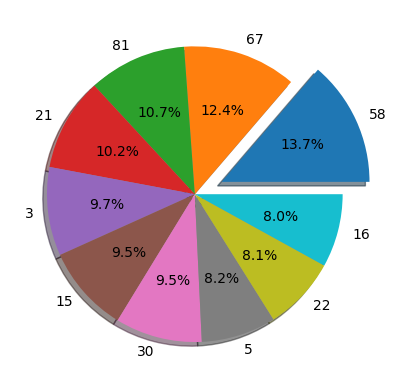

In [18]:
station_explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(start_station_id_dict.values(), labels = start_station_id_dict.keys(), explode = station_explode, autopct='%1.1f%%', shadow = True)

plt.show()

> Have some big difference of start station, Station id 58 use 13.7% of total station. It's a big ratio because we are have 329 station in our dataset. In the 10 popular stations, the difference ratio is 5.6%, It's also a significant difference.

###  #2 The proportion of men, women, and other

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int64         
 4   start_station_name       183215 non-null  string        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In [20]:
member_gender_dict = df.member_gender.value_counts().to_dict()

In [21]:
member_gender_dict

{'Male': 130500, 'Female': 40805, 'Other': 3647}

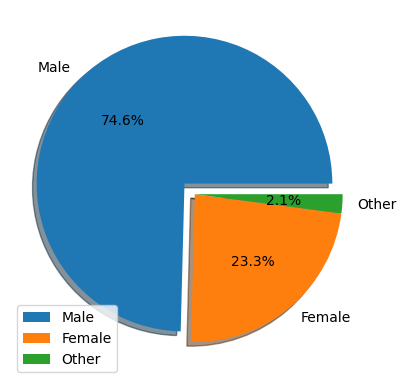

In [22]:
gender_explode = [0.1, 0, 0]

plt.pie(member_gender_dict.values(), labels = member_gender_dict.keys(), explode = gender_explode, autopct='%1.1f%%', shadow = True)
plt.legend()

plt.show()

See this visualization, We can see that Almost of gender is Male with 74.6%. Maybe men are more interested in exercise.

### #3 The number of customer and subcriber

In [23]:
user_type_dict = df.user_type.value_counts().to_dict()

In [24]:
user_type_dict

{'Subscriber': 163414, 'Customer': 19801}

<BarContainer object of 2 artists>

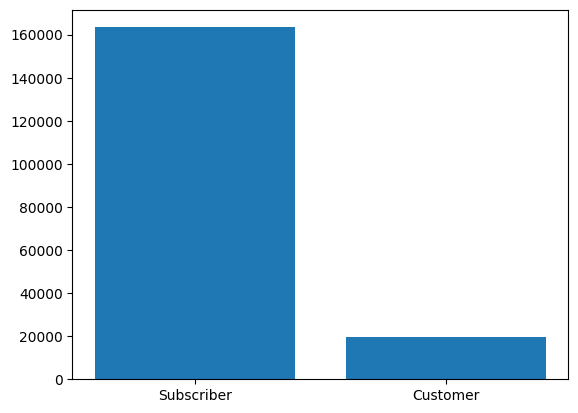

In [25]:
plt.bar(user_type_dict.keys(), user_type_dict.values())

> We can see that have a big difference between the number of Subscriber and Customer.

### #4 Analysis the duration sec

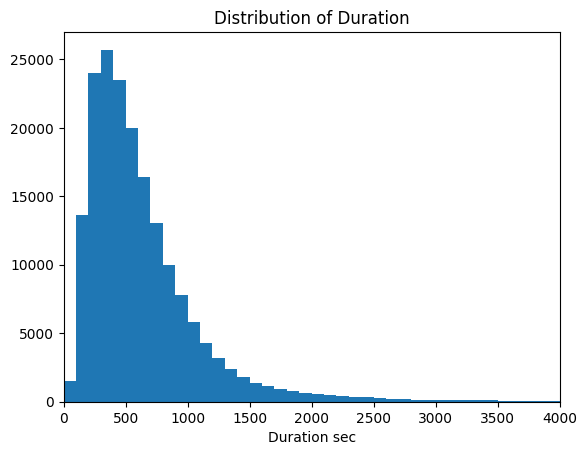

In [26]:
bin_size = 100
bins = np.arange(0, df['duration_sec'].max()+bin_size, bin_size)

# Visualization
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlim(0, 4000)
plt.xlabel('Duration sec')
plt.title('Distribution of Duration')
plt.show()

> The duration sec distribution is highly right-skewed. And we can see that the highest duration sec around 500.

### #5 Analysis day of week

In [27]:
day_dict = df['day_of_week'].value_counts().to_dict()
day_dict

{'Thursday': 35176,
 'Tuesday': 31781,
 'Wednesday': 29609,
 'Friday': 28962,
 'Monday': 26807,
 'Sunday': 15503,
 'Saturday': 15377}

Text(0.5, 1.0, 'Trips in the Week')

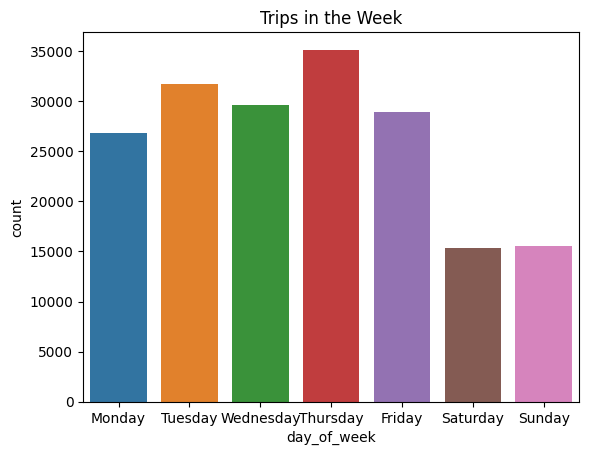

In [28]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


sb.countplot(data = df, x = 'day_of_week', order=weekday)
plt.title('Trips in the Week')

> The most trip on Thursday, following that is Tuesday. I surprise that trips on Saturday and Sunday are lowest.
It seems that these buses are used for commuting to work during the week a lot. We can explore more start hours of trips

### #6  Exploration start hour of trips

In [29]:
# Get the percentage count of trips made in terms of times of the day
start_hour_count = (df['start_hour'].value_counts()/df['start_hour'].count())*100

start_hour_count.round(2)

17    11.92
8     11.48
18     9.18
9      8.67
16     7.72
7      5.79
19     5.39
15     5.00
12     4.75
13     4.66
10     4.56
14     4.44
11     4.30
20     3.53
21     2.49
6      1.90
22     1.59
23     0.90
0      0.50
5      0.49
1      0.30
2      0.21
4      0.13
3      0.09
Name: start_hour, dtype: float64

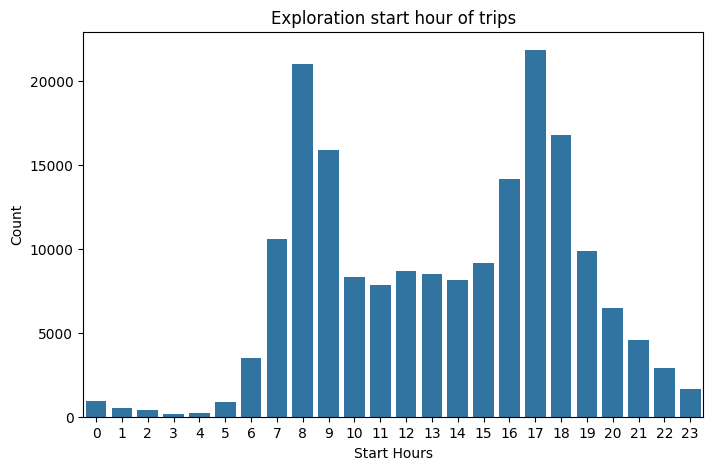

In [30]:
# plot distribution of day of week
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_hour', color = base_color)
plt.title('Exploration start hour of trips')
plt.xlabel('Start Hours')
plt.ylabel('Count')
plt.show()

> We can see that start hours often is 7AM or 17PM. It's the beauty time in day. It's suitable  with  the hours people  go to office and back home.

### #7 Exploration people age

In [31]:
# create the age column from member birth year
df['member_age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

display(df[['member_age']].head(5))

,member_age
0,35.0
1,NaN
2,47.0
3,30.0
4,45.0


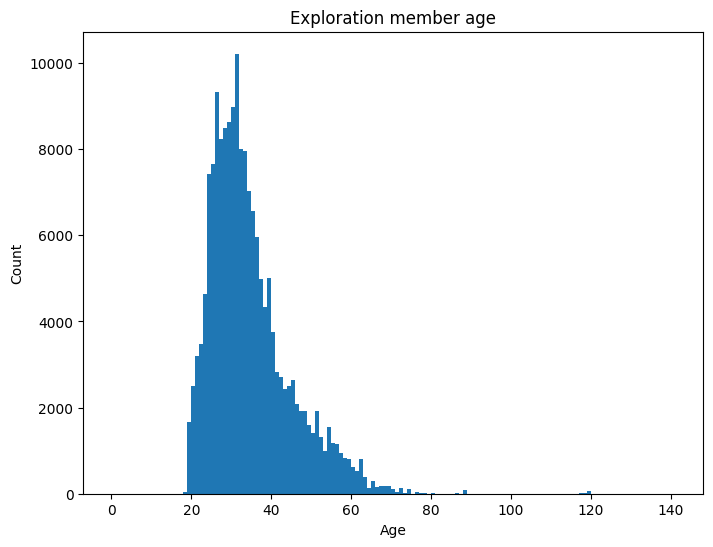

In [32]:
# start with a standard-scaled plot
bin_size = 1
bins = np.arange(0, df['member_age'].max()+bin_size, bin_size)

plt.figure(figsize=[8, 6])
plt.hist(data = df, x = 'member_age', bins=bins)
plt.title('Exploration member age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

> We can  see that the age average of member is around 40.The histogram is skewed to the right. 30-40 years old is the most common age. But especially we see some members who are almost 120 years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Have some variables I need to transformations: from start_time to day_of_week and start hours, from member_birth_year to member_age. These are all issues that concern me. gave me the results I expected.

>If there's one thing that I find unusual, it's that the day with the most trips is Thursday. If it were a weekday, I'd expect it to be Monday or Friday. I was quite surprised by this.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I think there are a few more age abnormalities. There are a few that are over 80 years old, and a few more close to 120. This makes me quite suspicious. But I think it's still in the human age range so it can't be deleted.

## Bivariate Exploration

> For ease of analysis, I think we should add duration_min from duration_sec

In [33]:
# Add duration_min columns
df['duration_min'] = (df['duration_sec'] / 60).round(2)

df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,start_hour,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,35.0,869.75
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,NaN,708.68
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,47.0,1030.90
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,30.0,608.17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,45.0,26.42


### #8 Explore relationship between user_type and average Duration min

In [34]:
# Caculate
user_type_duration_min = df[['user_type','duration_min']].groupby(['user_type'],as_index= False).mean().round(2)

user_type_duration_min

,user_type,duration_min
0,Customer,23.89
1,Subscriber,10.67


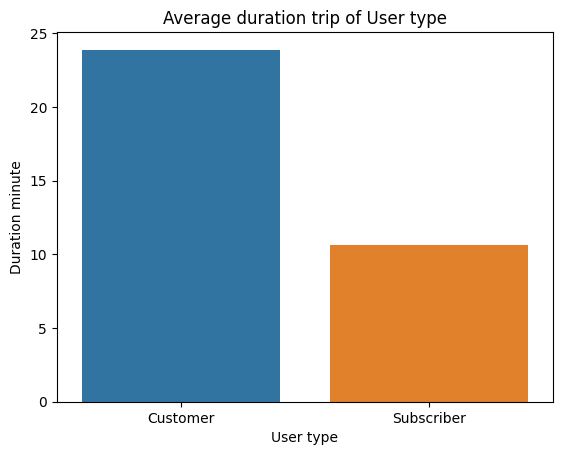

In [35]:
sb.barplot(x='user_type', y='duration_min', data=user_type_duration_min)
plt.title("Average duration trip of User type")
plt.xlabel("User type")
plt.ylabel("Duration minute")
plt.show()

> It is clear that the average trip time of Customer and Subscriber has much difference. Which Customer almost doubles.

### #9 Explore relationship between member_gender and average Duration min

In [36]:
# Caculate
member_gender_duration_min = df[['member_gender','duration_min']].groupby(['member_gender'],as_index= False).mean().round(2)

member_gender_duration_min

,member_gender,duration_min
0,Female,12.98
1,Male,11.21
2,Other,16.62


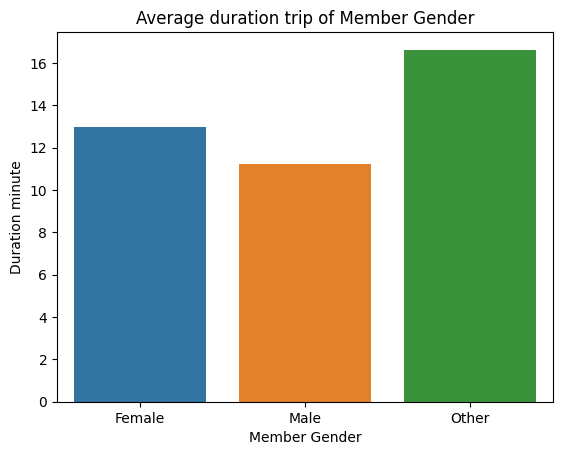

In [37]:
sb.barplot(x='member_gender', y='duration_min', data=member_gender_duration_min)
plt.title("Average duration trip of Member Gender")
plt.xlabel("Member Gender")
plt.ylabel("Duration minute")
plt.show()

> Although a greater percentage of male members, females tend to ride longer than men. The “Other” category with the highest average trip length makes me surprise.

### #10 Explore relationship between day of week and Duration_min average

In [38]:
duration_min_day_week = df[['day_of_week','duration_min']].groupby(['day_of_week'],as_index= False).mean().round(2)
duration_min_day_week

,day_of_week,duration_min
0,Friday,11.59
1,Monday,11.88
2,Saturday,15.03
3,Sunday,15.32
4,Thursday,11.65
5,Tuesday,11.05
6,Wednesday,11.23


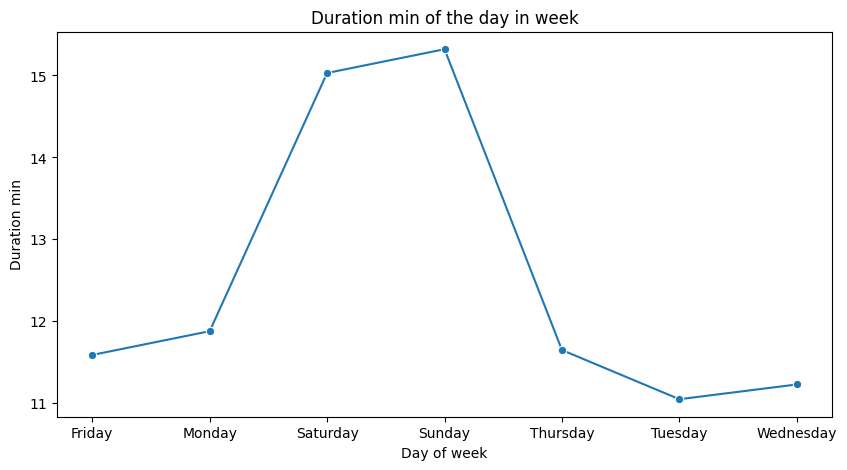

In [39]:
plt.figure(figsize=[10,5])
sb.lineplot(data=duration_min_day_week, x='day_of_week', y='duration_min',marker='o')
plt.ylabel('Duration min')
plt.xlabel('Day of week')
plt.title('Duration min of the day in week')
plt.show()

> We can clearly see that the two weekends are significantly more time for professionals to go than the weekdays. This seems to prove that weekend trips are far more relaxing.

### #11 Explore relationship between start hour and day of week

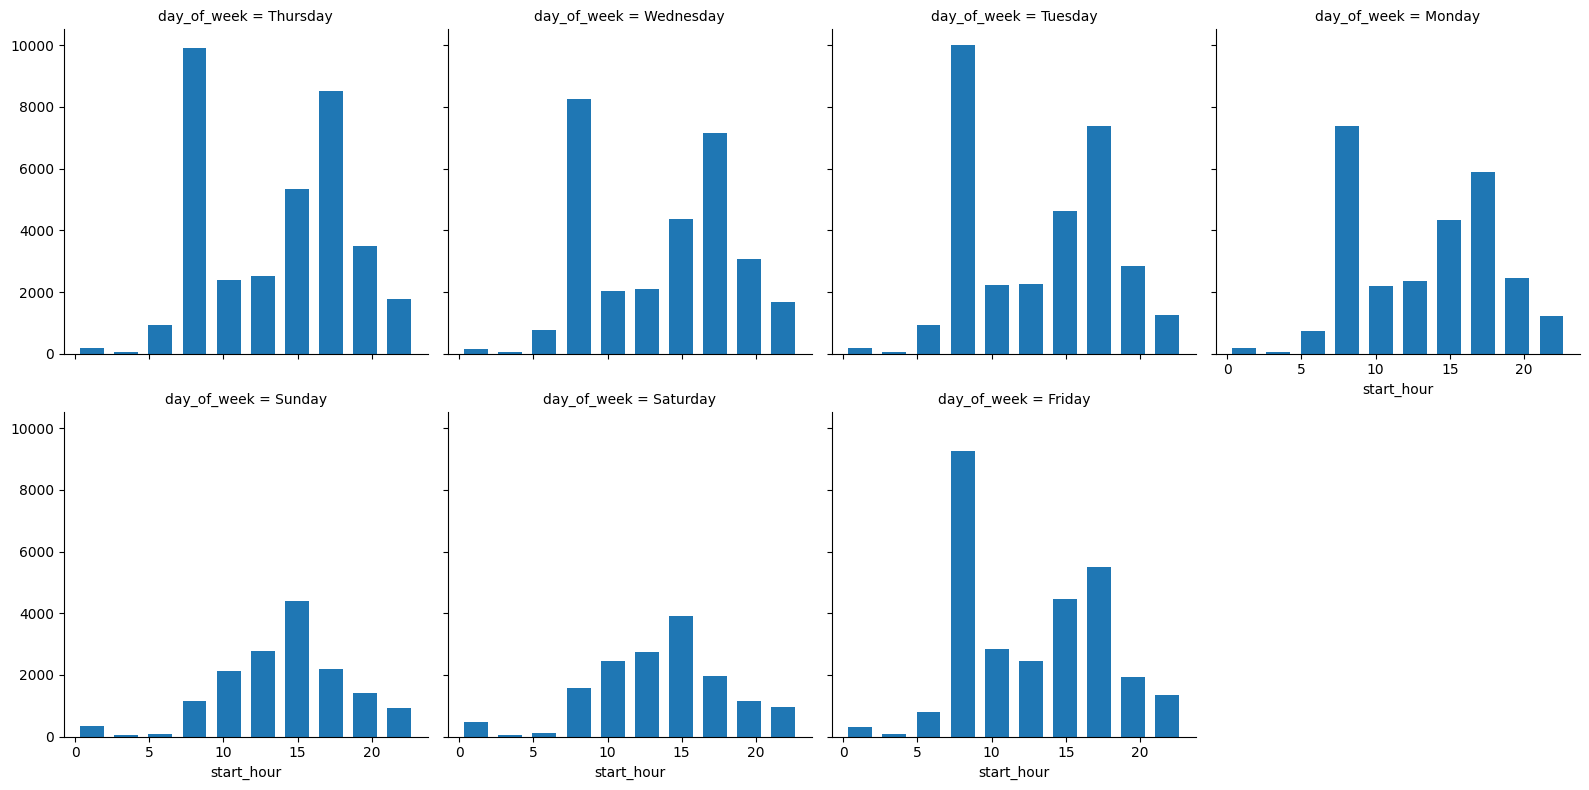

In [40]:
g = sb.FacetGrid(data = df, col = 'day_of_week', height=4, aspect=1, col_wrap=4)
g.map(plt.hist, 'start_hour', rwidth = 0.7)

> From this chart it can be judged that the Chart of the Days of the Week has a roughly similar shape. That is, the start hour does not have much difference between the days of the week.

> For the last 2 days it's a different chart shape. But they are also similar. 
> This can tell the difference between weekday and weekend start hour.

### #12 Explore relationship between start hour and Duration_min average

In [41]:
start_hour_duration = df[['start_hour','duration_min']].groupby(['start_hour'],as_index= False).mean().round(2)
start_hour_duration

,start_hour,duration_min
0,0,13.51
1,1,11.80
2,2,19.63
3,3,24.71
4,4,11.62
5,5,10.40
6,6,8.96
7,7,10.26
8,8,11.03
9,9,10.97


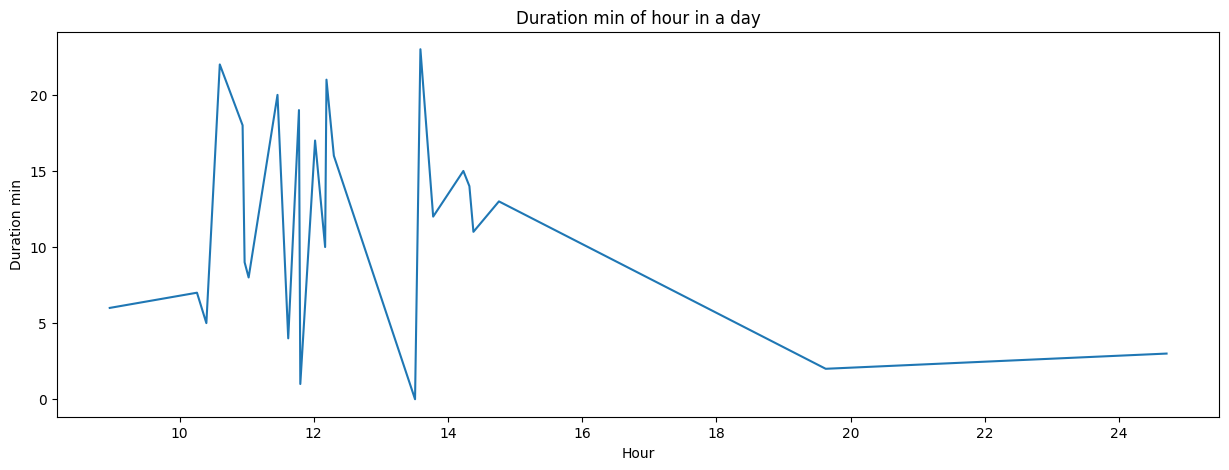

In [42]:
plt.figure(figsize=[15,5])
sb.lineplot(data=start_hour_duration, x='duration_min', y='start_hour')
plt.ylabel('Duration min')
plt.xlabel('Hour')
plt.title('Duration min of hour in a day')
plt.show()

> One thing I find strange is that although the early morning and evening time period is the time with the most trips, the duration is quite low. The time around noon is quite high.
> After 6pm, most trips are short trips.

### #13 Explore relationship Member gender and  user type

<Axes: xlabel='member_gender', ylabel='count'>

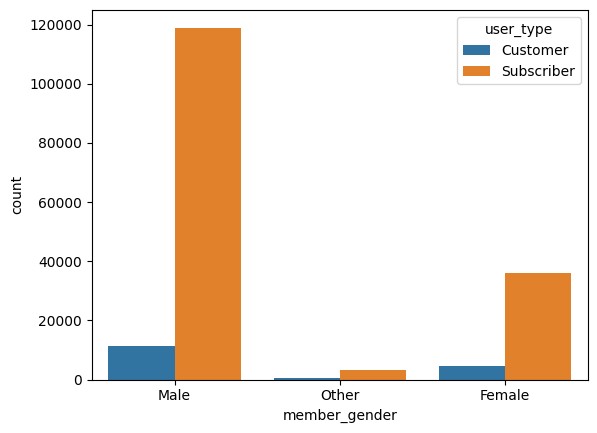

In [43]:
sb.countplot(data=df, x="member_gender", hue="user_type")

> We can be seen that there is a large difference in all 3 types of gender between the ratio of Customer and Subscriber.
> It is also not surprising that the higher the proportion of men, the larger the difference in numbers. Maybe 110,000 difference

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, I have observed many relationships: user_type and average Duration min, member_gender and average Duration min, day of week and Duration_min average, start hour and day of week, start hour and Duration_min average, and Member gender and user type
> - During periods of the day with many trips, the duration time is not high
> - Weekdays are the same, so are weekends
> - Customer's average trip time is much higher than Subscriber's
> - The difference between male and female members does not affect Duration time


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One thing that I find extremely interesting when exploring the relationship between Duration time of the sexes. You see, it's surprising that the gender with the largest duration time is other. Meanwhile, although the number of male members is overwhelming, the duration time of female is higher. It's really interesting.

## Multivariate Exploration


### #14 Average trip duration between Customer and Subcriber

In [44]:
# Caculate average
duration_min_avr = df.groupby(['user_type','day_of_week']).duration_min.mean().round(2)

# Reset the index, or a level of it.
duration_min_avr = duration_min_avr.reset_index(drop=False)

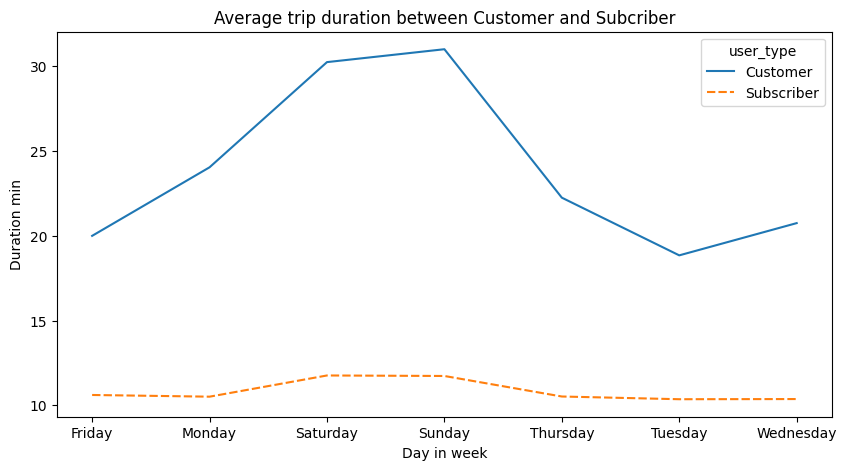

In [45]:
# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = duration_min_avr, x='day_of_week', y='duration_min', hue='user_type', style='user_type')
plt.title("Average trip duration between Customer and Subcriber")
plt.xlabel('Day in week');
plt.ylabel('Duration min');

> We can see that the average weekly Customer trip time is much higher Subscriber. While the average daily Subscriber is around 10. The Customer's fluctuates with a large amplitude of 20-30 minutes on average per day.

> Now, we can analyze the relationship between Customor and Subscriber in start hour variables.

###  #15 Duration between Customer and Subcriber

In [46]:
day_week_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Satuurday', 'Sunday']

sorter_index = dict(zip(day_week_sorted,range(len(day_week_sorted))))

In [47]:
df['day_week'] = df['day_of_week'].map(sorter_index)

In [48]:
# Caculate average
start_hour_avr = df.groupby(['user_type','day_week']).start_hour.mean().round(2)

# Reset the index, or a level of it.
start_hour_avr = start_hour_avr.reset_index(drop=False)

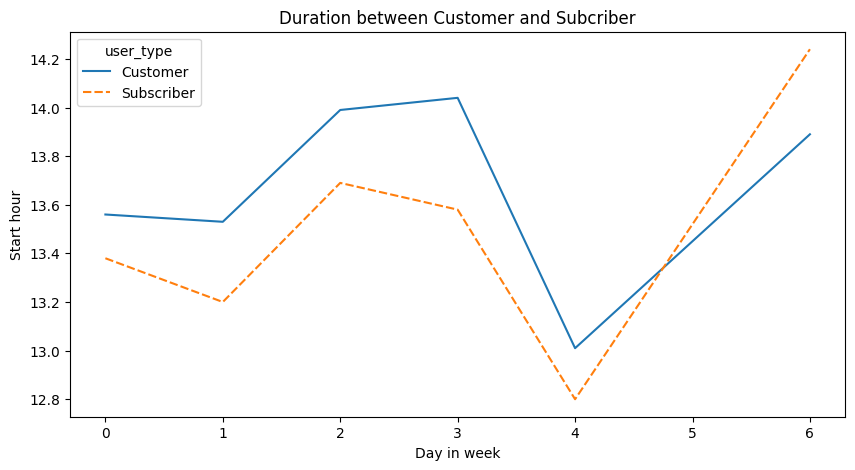

In [49]:
# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = start_hour_avr, x='day_week', y='start_hour', hue='user_type', style='user_type')
plt.title("Duration between Customer and Subcriber")
plt.xlabel('Day in week');
plt.ylabel('Start hour');

> We can see that Customor start hours on average are later on weekdays and tend to be lower on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I am interested in the relationship between Customer and Subscriber. It can be seen that the average usage time of Customer is longer. It reinforces that Customer subscribers really care about this and spend more time on trips

### Were there any interesting or surprising interactions between features?

> Perhaps what surprised me the most was that the average time for Subscriber and Customer trips varied greatly. From 10-20m on average per trip. This is really a big difference and surprised me

In [50]:
# export the new dataset for explain section
df.to_csv("new_201902-fordgobike-tripdata.csv", index=False)

## Conclusions



> From the original data, I added the average trip duration in minutes, days of the week and time of day, and the age of the member. I took full advantage of the variables I added to make the main variables in my analysis. Based on these factors, I did a lot of multivariate analysis, which can be mentioned as: user_type and average Duration min, member_gender and average Duration min, day of week and Duration_min average, start hour and day of week, start hour and Duration_min average, and Member gender and user type, day_of_week and duration_min and user_type.

> All in all, there's a lot to expect in addition to many exciting new discoveries.